<a href="https://colab.research.google.com/github/22MH1A4242/DEVOPS4242/blob/main/Copy_of_dl4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5007 - loss: 467.9312 - val_accuracy: 0.4985 - val_loss: 63.9808
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5069 - loss: 71.4051 - val_accuracy: 0.5018 - val_loss: 13.9711
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5059 - loss: 11.8346 - val_accuracy: 0.5032 - val_loss: 4.0096
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5042 - loss: 3.9662 - val_accuracy: 0.5026 - val_loss: 2.2803
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5052 - loss: 2.3970 - val_accuracy: 0.4992 - val_loss: 1.7554
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4982 - loss: 1.9456 - val_accuracy: 0.5044 - val_loss: 1.4065
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4964 - loss: 1.5158 - val_accuracy: 0.4971 - val_loss: 1.3468
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5005 - loss: 1.3805 - val_accuracy: 0.4992 

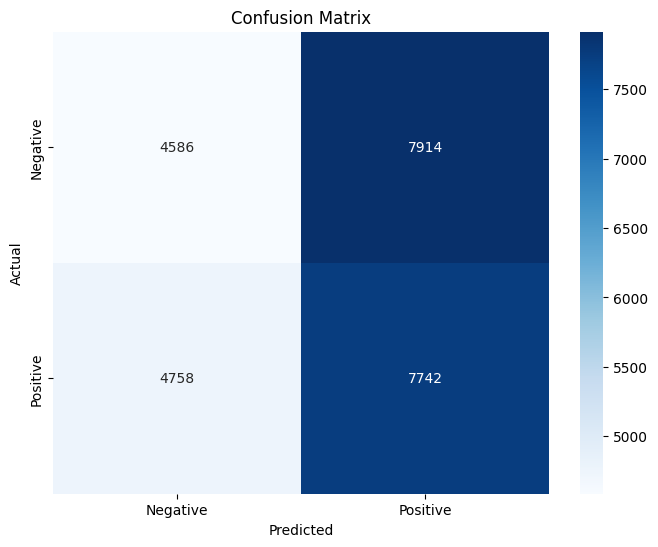

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred, target_names=["negative", "positive"]))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()